# Module 2: Fondements du Machine Learning
**Auteur:** Dr. Michel MAMA TOULOU, Expert en Intelligence Artificielle

## 2.1 Concepts Fondamentaux

### Définitions et terminologie

Le **Machine Learning (ML)** est une branche de l'intelligence artificielle (IA) qui permet aux systèmes d'apprendre à partir de données, sans être explicitement programmés. Au lieu de cela, ils utilisent des algorithmes pour analyser les données, en tirer des conclusions et prendre des décisions basées sur ces conclusions.

*   **Algorithme :** Un ensemble de règles ou d'instructions qu'un ordinateur suit pour résoudre un problème.
*   **Modèle :** La représentation apprise par un algorithme à partir des données d'entraînement.
*   **Entraînement :** Le processus d'apprentissage d'un modèle à partir des données.
*   **Prédiction :** L'utilisation d'un modèle entraîné pour faire des estimations ou des classifications sur de nouvelles données.

### Features, labels, instances

*   **Features (caractéristiques) :** Les variables d'entrée utilisées pour faire des prédictions. Par exemple, dans un modèle de prédiction du prix des maisons, les features pourraient inclure la superficie, le nombre de chambres, et la localisation.
*   **Labels (étiquettes) :** La variable cible que nous essayons de prédire dans l'apprentissage supervisé. Par exemple, le prix de la maison.
*   **Instances (échantillons) :** Les points de données individuels utilisés pour entraîner ou tester le modèle. Chaque instance est composée de features et, dans l'apprentissage supervisé, d'un label.

Voici un exemple simple :

| Superficie (m²) | Nombre de chambres | Localisation | Prix (€) |
|---|---|---|---|
| 150 | 3 | Centre-ville | 350,000 |
| 200 | 4 | Banlieue | 400,000 |
| 100 | 2 | Centre-ville | 250,000 |

Dans cet exemple :
*   **Features :** Superficie, Nombre de chambres, Localisation
*   **Label :** Prix
*   **Instances :** Chaque ligne du tableau est une instance.

### Apprentissage supervisé vs non supervisé

**Apprentissage Supervisé :**
Dans l'apprentissage supervisé, l'algorithme apprend à partir d'un ensemble de données étiquetées, c'est-à-dire des données où la variable cible (label) est connue. L'objectif est de prédire la variable cible à partir des features.

*   **Exemples :** Classification (prédire une catégorie) et régression (prédire une valeur continue).

**Apprentissage Non Supervisé :**
Dans l'apprentissage non supervisé, l'algorithme apprend à partir d'un ensemble de données non étiquetées. L'objectif est de découvrir des structures ou des relations cachées dans les données.

*   **Exemples :** Clustering (regrouper des données similaires) et réduction de dimension (simplifier les données en réduisant le nombre de features).

Voici un tableau comparatif :

| Caractéristique | Apprentissage Supervisé | Apprentissage Non Supervisé |
|---|---|---|
| Données | Étiquetées | Non étiquetées |
| Objectif | Prédire une variable cible | Découvrir des structures |
| Exemples | Classification, Régression | Clustering, Réduction de dimension |

### Processus de modélisation

Le processus de modélisation en Machine Learning comprend plusieurs étapes clés :

1.  **Collecte des données :** Rassembler les données nécessaires pour entraîner le modèle.
2.  **Préparation des données :** Nettoyer, transformer et préparer les données pour l'entraînement.
3.  **Choix du modèle :** Sélectionner l'algorithme de Machine Learning approprié pour le problème.
4.  **Entraînement du modèle :** Utiliser les données d'entraînement pour apprendre les paramètres du modèle.
5.  **Évaluation du modèle :** Mesurer la performance du modèle sur des données de test.
6.  **Optimisation du modèle :** Ajuster les paramètres du modèle pour améliorer sa performance.
7.  **Déploiement du modèle :** Mettre le modèle en production pour faire des prédictions sur de nouvelles données.

![Processus de modélisation](https://miro.medium.com/v2/resize:fit:1400/1*CPZZtgJgGv99Jbg0m3fytw.png)

### Split train/validation/test

Pour évaluer correctement un modèle de Machine Learning, il est essentiel de diviser les données en trois ensembles distincts :

*   **Ensemble d'entraînement (Train set) :** Utilisé pour entraîner le modèle.
*   **Ensemble de validation (Validation set) :** Utilisé pour ajuster les hyperparamètres du modèle et éviter le surapprentissage.
*   **Ensemble de test (Test set) :** Utilisé pour évaluer la performance finale du modèle après l'entraînement et l'optimisation.

La division typique est de 70% pour l'entraînement, 15% pour la validation et 15% pour le test.

Voici un exemple en Python utilisant `scikit-learn` :

In [4]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\machine_learning_fundamentals.ipynb
from sklearn.model_selection import train_test_split
import numpy as np

# Générer des données aléatoires pour l'exemple
X = np.random.rand(100, 5)  # 100 instances, 5 features
y = np.random.randint(0, 2, 100)  # 100 labels binaires (0 ou 1)

# Diviser les données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de validation :", len(X_val))
print("Taille de l'ensemble de test :", len(X_test))

Taille de l'ensemble d'entraînement : 80
Taille de l'ensemble de validation : 10
Taille de l'ensemble de test : 10


### Validation croisée

La validation croisée est une technique utilisée pour évaluer la performance d'un modèle de Machine Learning en divisant les données en plusieurs sous-ensembles (folds). Le modèle est entraîné sur certains folds et évalué sur les folds restants. Ce processus est répété plusieurs fois, chaque fois avec une combinaison différente de folds pour l'entraînement et l'évaluation. Les résultats sont ensuite moyennés pour obtenir une estimation plus robuste de la performance du modèle.

**K-Fold Cross-Validation :**
La méthode la plus courante est la K-Fold Cross-Validation, où les données sont divisées en K folds.

Voici un exemple en Python utilisant `scikit-learn` :

In [5]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\machine_learning_fundamentals.ipynb
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Créer un modèle de régression logistique
model = LogisticRegression()

# Effectuer une validation croisée avec 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Scores de validation croisée :", scores)
print("Précision moyenne :", scores.mean())

Scores de validation croisée : [0.375  0.375  0.4375 0.625  0.5625]
Précision moyenne : 0.475


### Évaluation des modèles

L'évaluation des modèles est une étape cruciale pour déterminer la performance d'un modèle de Machine Learning. Elle permet de s'assurer que le modèle est capable de généraliser à de nouvelles données et de prendre des décisions précises.

**Types d'évaluation :**

*   **Évaluation hors ligne :** Évaluation sur des données historiques.
*   **Évaluation en ligne :** Évaluation en temps réel sur des données de production.

### Métriques de performance

Il existe plusieurs métriques pour évaluer la performance d'un modèle, en fonction du type de problème (classification ou régression) :

**Classification :**

*   **Précision (Accuracy) :** Le pourcentage de prédictions correctes.
*   **Précision (Precision) :** La proportion de prédictions positives correctes parmi toutes les prédictions positives.
*   **Rappel (Recall) :** La proportion de vrais positifs correctement identifiés.
*   **F1-score :** La moyenne harmonique de la précision et du rappel.

**Régression :**

*   **Erreur quadratique moyenne (MSE) :** La moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.
*   **Erreur absolue moyenne (MAE) :** La moyenne des valeurs absolues des erreurs.
*   **Coefficient de détermination (R²) :** La proportion de la variance de la variable cible expliquée par le modèle.

Voici un exemple en Python utilisant `scikit-learn` :

In [ ]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\machine_learning_fundamentals.ipynb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

# Entraîner un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques de performance pour la classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Précision :", accuracy)
print("Précision :", precision)
print("Rappel :", recall)
print("F1-score :", f1)

# Faire des prédictions (pour l'exemple de régression, on utiliserait un modèle de régression)
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred_reg = regression_model.predict(X_test)

# Calculer les métriques de performance pour la régression
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print("MSE :", mse)
print("MAE :", mae)
print("R² :", r2)

Précision : 0.4
Précision : 0.0
Rappel : 0.0
F1-score : 0.0
MSE : 0.2677245419924289
MAE : 0.49754865504714835
R² : -0.6732783874526802


### Courbes ROC, matrice de confusion

**Courbe ROC (Receiver Operating Characteristic) :**
La courbe ROC est un graphique qui montre la performance d'un modèle de classification binaire à différents seuils de classification. Elle trace le taux de vrais positifs (TPR) en fonction du taux de faux positifs (FPR). L'aire sous la courbe ROC (AUC) est une mesure de la capacité du modèle à distinguer les classes.

**Matrice de confusion :**
La matrice de confusion est un tableau qui résume les résultats de classification d'un modèle. Elle montre le nombre de vrais positifs (TP), de faux positifs (FP), de vrais négatifs (TN) et de faux négatifs (FN).

Voici un exemple en Python utilisant `scikit-learn` :

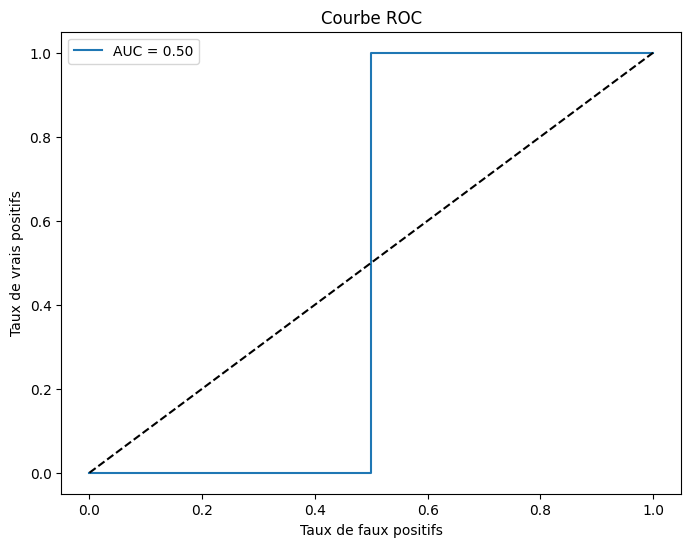

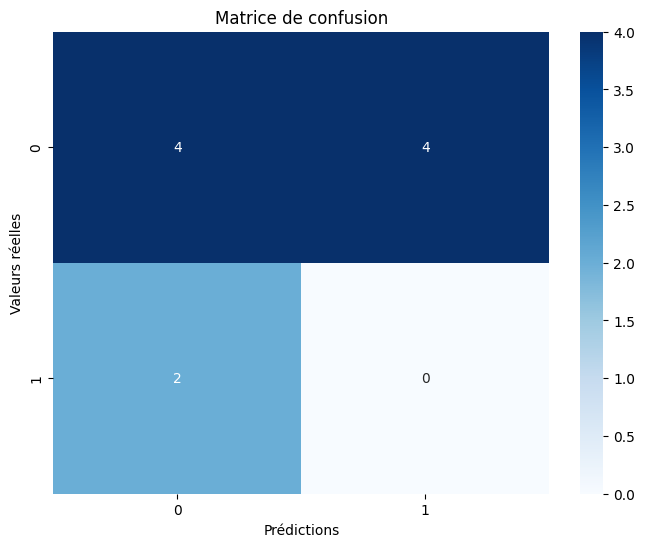

In [7]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\machine_learning_fundamentals.ipynb
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Faire des prédictions de probabilité sur l'ensemble de test
y_prob = model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
auc = roc_auc_score(y_test, y_prob)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

### Bias-variance tradeoff

Le compromis biais-variance est un concept fondamental en Machine Learning qui décrit la relation entre le biais et la variance d'un modèle.

*   **Biais :** L'erreur systématique d'un modèle due à des hypothèses simplificatrices. Un modèle avec un biais élevé est susceptible de sous-apprendre les données (underfitting).
*   **Variance :** La sensibilité d'un modèle aux variations des données d'entraînement. Un modèle avec une variance élevée est susceptible de surapprendre les données (overfitting).

L'objectif est de trouver un équilibre entre le biais et la variance pour obtenir un modèle qui généralise bien à de nouvelles données.

![Bias-variance tradeoff](https://i.stack.imgur.com/S4BLN.png)

## 2.2 Préprocessing des Données

### Nettoyage et imputation

Le nettoyage et l'imputation des données sont des étapes essentielles du prétraitement des données. Ils permettent de traiter les valeurs manquantes, les erreurs et les incohérences dans les données.

*   **Valeurs manquantes :** Les valeurs manquantes peuvent être imputées en utilisant différentes techniques, telles que la suppression des lignes contenant des valeurs manquantes, l'imputation par la moyenne ou la médiane, ou l'utilisation d'algorithmes de Machine Learning pour prédire les valeurs manquantes.
*   **Erreurs et incohérences :** Les erreurs et les incohérences peuvent être corrigées en vérifiant les données par rapport à des règles de validation, en utilisant des techniques de détection d'anomalies, ou en consultant des experts du domaine.

Voici un exemple en Python utilisant `pandas` et `scikit-learn` :

In [8]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\machine_learning_fundamentals.ipynb
import pandas as pd
from sklearn.impute import SimpleImputer

# Créer un DataFrame avec des valeurs manquantes
data = {'col1': [1, 2, None, 4, 5],
        'col2': [6, None, 8, 9, 10],
        'col3': [11, 12, 13, None, 15]}
df = pd.DataFrame(data)

# Imputer les valeurs manquantes en utilisant la moyenne
imputer = SimpleImputer(strategy='mean')
df['col1'] = imputer.fit_transform(df[['col1']])
df['col2'] = imputer.fit_transform(df[['col2']])
df['col3'] = imputer.fit_transform(df[['col3']])

print(df)

   col1   col2   col3
0   1.0   6.00  11.00
1   2.0   8.25  12.00
2   3.0   8.00  13.00
3   4.0   9.00  12.75
4   5.0  10.00  15.00


### Normalisation et standardisation

La normalisation et la standardisation sont des techniques de mise à l'échelle des données qui permettent de transformer les valeurs des features pour qu'elles aient une plage ou une distribution similaire.

*   **Normalisation :** Met à l'échelle les valeurs entre 0 et 1.
*   **Standardisation :** Met à l'échelle les valeurs pour qu'elles aient une moyenne de 0 et un écart type de 1.

Voici un exemple en Python utilisant `scikit-learn` :

In [ ]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\machine_learning_fundamentals.ipynb
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Créer un DataFrame
data = {'col1': [1, 2, 3, 4, 5],
        'col2': [6, 7, 8, 9, 10],
        'col3': [11000, 120000, 13000, 14000, 1500]}
df = pd.DataFrame(data)

# Normalisation
scaler = MinMaxScaler()
df[['col1', 'col2', 'col3']] = scaler.fit_transform(df[['col1', 'col2', 'col3']])

print("Après normalisation :")
print(df)

# Standardisation
scaler = StandardScaler()
df[['col1', 'col2', 'col3']] = scaler.fit_transform(df[['col1', 'col2', 'col3']])

print("Après standardisation :")
print(df)

Après normalisation :
   col1  col2  col3
0  0.00  0.00  0.00
1  0.25  0.25  0.25
2  0.50  0.50  0.50
3  0.75  0.75  0.75
4  1.00  1.00  1.00
Après standardisation :
       col1      col2      col3
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214


### Feature engineering

Le feature engineering est le processus de création de nouvelles features à partir des features existantes pour améliorer la performance d'un modèle de Machine Learning. Il peut impliquer la transformation des features, la combinaison de features, ou la création de features basées sur des connaissances du domaine.

**Exemples :**

*   Création de features polynomiales.
*   Création de features d'interaction.
*   Extraction de features à partir de données textuelles ou d'images.

### Réduction de dimension

La réduction de dimension est le processus de réduction du nombre de features dans un ensemble de données tout en conservant l'information importante. Elle peut être utilisée pour simplifier les modèles, réduire le temps de calcul, et améliorer la performance.

**Techniques :**

*   **Analyse en composantes principales (ACP) :** Une technique linéaire qui transforme les données en un ensemble de composantes principales non corrélées.
*   **UMAP (Uniform Manifold Approximation and Projection)**: Une technique non-linéaire de réduction de dimension qui est bien adaptée pour visualiser des données de grande dimension.
*   **Sélection de features :** Sélectionner un sous-ensemble de features pertinentes en fonction de leur importance ou de leur contribution à la performance du modèle.

Voici un exemple en Python utilisant `scikit-learn` et `umap-learn`:

In [10]:
! pip install umap-learn

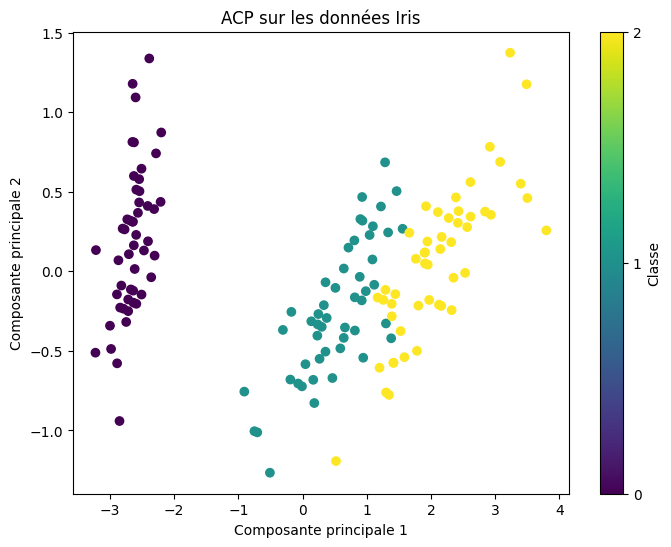

c:\Users\michel.bertrand.mama\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


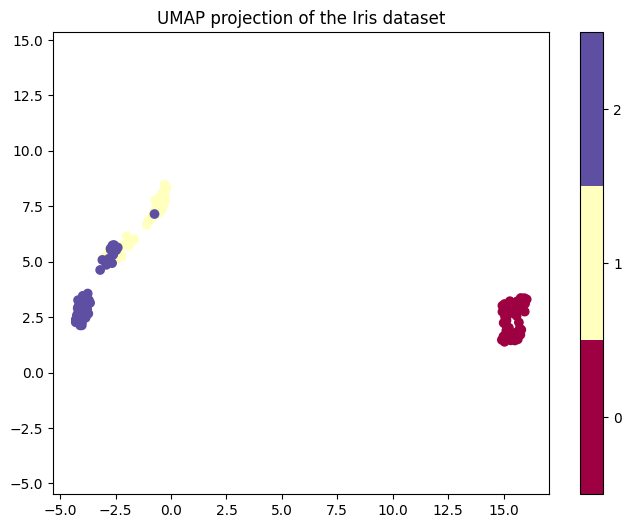

In [14]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\machine_learning_fundamentals.ipynb
from sklearn.decomposition import PCA
import umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Charger les données Iris
iris = load_iris()
X = iris.data
y = iris.target

# ACP
pca = PCA(n_components=3)  # Réduire à 2 composantes principales
X_pca = pca.fit_transform(X)
df_pca = pca.transform(X)

# Affichage ACP
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP sur les données Iris')
plt.colorbar(ticks=[0, 1, 2], label='Classe')
plt.show()

# UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(X)
df_umap = embedding #Ajout

# Affichage UMAP
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
plt.title('UMAP projection of the Iris dataset', fontsize=12)
plt.show()

# print("Données après ACP :")
# print(df_pca)

# print("Données après UMAP :")
# print(df_umap)

## Liens utiles pour la documentation

*   **Scikit-learn :** [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
*   **UMAP :** [https://umap-learn.readthedocs.io/en/latest/](https://umap-learn.readthedocs.io/en/latest/)
*   **Pandas :** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)
*   **Numpy :** [https://numpy.org/doc/](https://numpy.org/doc/)
*   **Matplotlib :** [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)